# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

%matplotlib inline

# What is logistic regression ?

        Logistic Regression is a classification example knon for its simplicity and robustness.
        In Linear Regression our aim was to come up with a hypothesis that helps us to fit a straight line through the data.
        In logistic regression the value we are trying to predict Y belongs to {0,1} for binary classification.
        We also have Multiclass classification where Y belongs to {0,...,k} k being strictly > 1.
        
        Here we will work on Binary classification.
        So the Hypothesis we require must predict values either 0 or 1.
        hence in order to achive this we use the logit (sigmoid) function, thus due to this function the algorithm 
        gets it name Logistic Regression.
        
# what is this sigmoid function ?

        sigmoid(t) = 1/(1+e^-t)
![](sigmoid.png)

         so, when t->inf : sigmoid(t) = 1 ; and when t-> inf : sigmoid(t) = 0 ; at t=0 ; sigmoid(t) = 0.5

        lets consider Theta to be our paramters which we need to minimize X is the data(features values) Y is labels{0,1}

   Then the hypothesis can be given by :  H<sub>theta</sub>(X) = sigmoid(theta.T @ X)
          
         considering theta to be a row vector 1Xn and X a mXn vector;n being the num of features , m = total examples.
         
         so Yi = 1 if H(Xi;given theta) >= 0.5 ; Yi = 0 if H(X)< 0.5
         in simple words when if H(X,theta) is 0.5 or greater we predict Y = 1
                                 H(X, theta) is less that 0.5 we predict Y = 0
                                 
         From the Sigmoid function we can observe:
                 sigmoid(t) is >= 0.5 when t>=0
                               <  0.5 when t< 0
                               
         our Hypothesis H(X, theta) = Sigmoid(theta.T @ X)
         so : H(X,theta) = Sigmoid(theta.T @ X) >= 0.5 when theta.T @ X >=0
                                                      <  0.5 when theta.T @ X < 0
                                                      
         Hence we can conclude that we predict Y = 1 when theta.T @ X >=0
                                               Y = 0 when theta.T @ X < 0
                                               
# How the Hypothesis is used for predicting labels:

         lets assume theta=[[theta0],[theta1]] and X = [[x0,x1]]
         assume H(X,theta) = 0.7
         
         The Hypothesis H(X,theta) = P(Y=1|given X,theta)
         so as H(X,theta) = 0.7 it suggest that probability of Y=1 given the value of X and parameterized by theta is 0.7
         
         Also Y must be 0 or 1, so probability of 0 and 1 must add upto 1:
         Therefore , P(Y=1|given X,theta) + P(Y=0|given X,theta) = 1
                     P(Y=0|given X,theta) = 1 - P(Y=1|given X,theta)
              
         Finally if P(Y=1|given X,theta) >= 0.5 ( H(X,theta) >= 0.5) we predict Y = 1
                    P(Y=1|given X,theta) <  0.5 ( H(X,theta) < 0.5 ) we predict Y = 0
                    
# Create the Sigmoid Function:

In [2]:
def Sigmoid(x):
    z= 1/(1 + np.exp(-(x)))
    return z

    Difference between using math.exp or math.log and using np.exp or np.log (np.log is used later in cost function)

    when we use math.exp(x) : x is treated as a single value 
    So, if X is a vector or matrix(a numpy array) we will have to use loops manually apply exp to each element in x
    
    In case of np.exp(x) : x is treated as vector or matrix(a numpy array)
    therefore this function is applied to all of the elements of a numpy array individually.
    
# Testing the sigmoid function:

In [3]:
x= np.array([-10,-5,-1,0,1,5,10])
z= Sigmoid(x)
print("Sigmoid values:")
print(z)

Sigmoid values:
[4.53978687e-05 6.69285092e-03 2.68941421e-01 5.00000000e-01
 7.31058579e-01 9.93307149e-01 9.99954602e-01]


# Requirements of the algorithm:

    1. we will need to transpose an array
    2. we need add a column of 1 i.e X0 in X 
    
    let prediction(theta,Xi) be a function that estimates Yi for given Xi and Optimum theta.
    
        Prediction(theta,Xi): theta is 1d vector [theta0 , theta1 , theta2]; theta is the optimized value of theta such 
        error in predicting  label for Xi and actual label (cost) is minimum.

        Xi is an example or an instance of X (an entire row with attribute X1 , X2)
        The predicted value for Xi is given by:
        Prediction(theta,Xi) = 1/( 1+ e^-(X @ theta.Transposed)
                             = 1/( 1+ e^-(theta0 + theta1* X1 +theta2* X2)
                             = 1/( 1+ e^-(theta0*X0 + theta1* X1 +theta2* X2) (X0 is always =1)
                             
        if Prediction(theta,Xi) >= 0.5 we predict Y = 1 
           Prediction(theta,Xi) <  0.5 we predict Y = 0 

# Transpose a 1d vector/array and 2d array or matrices:

In [4]:
a = np.array([[1,2,3]]) # 2d array with 1 row 3 column
print(a)
A = a.T
print("\nAfter Transpose\n")
print(A)
print("******************************\n")

b= np.array([1,2,3])  #1d array with 3 elements (the row concept does not come into play here)
print(b)
B= b.T
print("\nAfter Transpose\n")
print(B)  # hence the notation of concept doesnt work in 1d array , a 1d row is not transformed into 1d column
print("*********************\n")

c = np.array([[1,2,3],[4,5,6]])  #2d array with 2 rows 3 cols
C= c.T
print(c)
print("\nAfter Transpose\n")
print(C)

[[1 2 3]]

After Transpose

[[1]
 [2]
 [3]]
******************************

[1 2 3]

After Transpose

[1 2 3]
*********************

[[1 2 3]
 [4 5 6]]

After Transpose

[[1 4]
 [2 5]
 [3 6]]


# Function to insert a column of  all 1's as column number 0 in X

In [5]:
def addX0(X):                       
    X = np.array(X,dtype=float)
    l = len(X)
    X0 = np.ones((l,1),dtype=float)  # creating an array of 1 with l rows and 1 column (1d column vector)
    X = np.column_stack((X0,X)) 
    return X

# Testing the function addX0()

In [6]:
c = np.array([[6,2,3],[4,5,3],[3,9,6]])       #2d array with 2 rows 3 cols
print(c)
c = addX0(c)                                  # add a column of 1 in front i.e in each row add 1 at column = 0
print("\n After adding the column of all 1's at coloumn index 0\n")
print(c)

[[6 2 3]
 [4 5 3]
 [3 9 6]]

 After adding the column of all 1's at coloumn index 0

[[1. 6. 2. 3.]
 [1. 4. 5. 3.]
 [1. 3. 9. 6.]]


# The Cost Function:

        h(x,theta) = sigmoid(theta.T @ X) ; where X is a matrix of size (mXn) , theta is a row vector of size (1Xn)
        m = no of examples , n = no of features including X0 (if X0 is not added add X0)
        
        cost(X,Y,theta) = { if Y = 1 ; cost = -log(h(X,theta)
                               Y = 0 ; cost = -log(1-h(X,theta))
                               
        If y = 1 ; cost(h(x,theta),y) = - log( h(x,theta) )
        
![](logh.png)

        so cost = 0 ; if y=1, h(x,theta) = 1
        but as h(x,theta) -> 0 , cost -> inf
        
        This captures the intution that if Y=1 and h(x,theta) = 1, predict P(y=1|x,theta) = 1
        but if we predict P(y=1|x,theta) = 0 then we will penalize the learning algorithm by very large cost
        
         If y = 0 ; cost(h(x,theta),y) = - log( 1- h(x,theta) )
        
![](log1_h.png)

        so cost = 0 ; if y=0, h(x,theta) = 0
        but as h(x,theta) -> 1 , cost -> inf
        
        This captures the intution that if Y=0 and h(x,theta) = 0, predict P(y=1|x,theta) = 0
        but if we predict P(y=1|x,theta) = 1 then we will penalize the learning algorithm by very large cost.
        
        Finally the cost function can be given by
        
        cost(X,Y,theta) = 1/m * sum{ -yi * log(h(xi,theta)) - (1-yi)* log(1-h(xi,theta)) }
        where h(xi,theta) = sigmoid(xi @ theta.Transpose) , 1<=i<=m , m being no of examples in X ,Y
        
# Creating the Cost Function:

In [7]:
def costFunc(X,Y,theta):
    no_of_examples = len(Y)                       # Y is a 1d array with m elements , m being num of examples
    # if we consider Y as a 2d array , then numpy will consider Y as a vetor with 1 row and m columns, so Y = 1Xm
    
    X = addX0(X)                                  # adding X0 column to X
    # x = m X n matrix ; theta = n X 1 column vector where m is num of examples and n is num of features
    # @ is matrix multiplication; so X @ theta will be a m X 1 vector
    
    hyp = np.zeros((1,len(theta)),dtype=float)    
    hyp = Sigmoid(X @ theta)                      # 1/(1+e^-(X @ Theta.T))

    const = 1e-5
    #const = 0.00005 its used so that is in case log(x) x becomes 0 we will get math error as log(0) is undefined
    # hence x = 0.00005 will prevent such math errors in case x = 0
                                      
    cost = (1/no_of_examples) * ( ( (-Y) @ np.log(hyp + const) ) - ( (1-Y) @ np.log((1-hyp)+ const) ) )
    # Y (1Xm) , hyp (mX1) applying log and adding const are done element wise hence the results of log(hyp + const) = (mX1)
    # so Y @ log(hyp+1) or (1-y) @ log(1-hyp + const) will be a scalar . (1Xm @ mX1 gives a vector of shape 1X1 i.e scalar)
    
    return cost[0] # returns an array with single element hence just returning the element from array

# Minimize the cost function with respect to theta using Gradient Descent:

# what is gradient descent ?

        Gradient descent is an optimization algorithm used to find the values of parameters (coefficients) 
        of  cost function (f) that minimizes a cost function
    
        psuedocode:
            
        repeat untill no change in Theta
        {
            theta(j) = theta(j) - alpha *  d/d(thetaj) (cost(X,Y,theta))
        } for 0<=j<=n 
        
        
        what is alpha ?
        The learning rate.
        it controls by how much the coefficients (theta) changes with each update
        alpha large : the value of theta decreases rapidly with each update
        alpha small the value of theta decreases slowly with each update
        
        vectorized implementation:
            
        d/d(theta(j) cost(X,Y,theta) = d/d(theta(j) { 1/m * sum{ -yi*log(h(xi,theta)) - (1-yi)*log(1-h(xi,theta)) }} 
                                   where i = 1 to M
        after differentiating we get :
                                       
        d/d(theta(j) cost(theta) = (1/M) * sum{(h(xi,theta)-yi)X(i,j)} where i = 1 to M (row number )and j = column number  
        
        where h(xi,theta) = 1/(1 + e^-(xi @ theta.Transpose))
        so:
        theta(0)= theta(0) - alpha* {(1/M) * sum{ (h(xi,theta)-yi) * X(i,0) }} for i = 1 to M (row number )
        theta(1)= theta(1) - alpha* {(1/M) * sum{ (h(xi,theta)-yi) * X(i,1) }} for i = 1 to M (row number )
        .
        .
            
        now let delta = (1/M) * sum{ (h(xi,theta)-yi) @ X(i,j) } ,
                delta = (1/M) * sum{ (h(xi,theta)-yi) @ X(i,j) } ;   0 <= j <= n ; n = number of features , (from 0 as X0 is added)
                X(i,j) : depends on theta(for theta 1 : X(i,1)) while i denotes all rows 
                its basically a 1-dimensional vector
                
         so Theta = Theta - alpha*delta
         
         lastly, the values of theta vector for which the cost is minimum is our optimized theta

In [8]:
def GradientDescent(x,y,theta,alpha,num_iterations):
    no_of_examples = len(y)                           # Y is a 1d array with m elements , m being num of examples
    # if we consider Y as a 2d array , then numpy will consider Y as a vetor with 1 row and m columns, so Y = 1Xm
    
    cost_history = np.zeros(num_iterations,dtype=float)
    #cost_history is an array with elements=num_iteration,to store change in cost with each iteration (check convergence)
    
    Y = np.array([y])                            # as y is consider as a row vector we are converting it to a column vector
    Y = Y.T                                      # Y = y.T so Y =(mX1) , m being number of examples
    
    Theta= theta.T          # Theta = theta' coloumn vector , Theta =(nX1) n = num of features (including theta0 (for X0))
    # theta and y are converted into column vetors so that we can apply vectorization method(matrix multiplication)
    
    X = addX0(x)                                 # adding X0 column to x , X = (mXn) n = num of features including x0 term
    
    h = np.zeros((1,no_of_examples),dtype=float) #row vector(1Xm) store the errors between predicted class and actual class
    
    for i in range(num_iterations):
        cost_history[i] = costFunc(x,y,Theta) # stores the error with changes in theta for each iteration
        
        delta = (1/no_of_examples) * ( X.T @ ( Sigmoid(X @ Theta) - Y ) )
        # X.T=(nXm) , sigmoid(X@theta) = (mX1) , Y = (mX1)
        # so sigmoid(X@Theta) - Y gives a vector of shape (mX1)
        # X.T @ {sigmoid(X@Theta) - Y} = nXm @ mX1 ; so we get a vector of shape nX1 (same shape as Theta)
        
        Theta = Theta - (alpha*delta)
        # delta = X.T @ {sigmoid(X@Theta) - Y} , so delta has a shape (nX1) 
        # alpha is the learning rate and we performed an element wise mutiplication of alpha , delta ;
        # alpha is a scalar value so alpha * delta means simply multiply each term in delta with alpha
        # so alpha * delta has same shape as delta = (nX1) which is same as Theta
        
    return Theta,cost_history

# Function for making Predictions:

        we get the optimied_theta = [theta0,theta1,...thetaN] after running gradient descent. 
        Then to predict the class label of an  unknown example given by X = [X0,X1,...XN]
        
        prediction = Probability(Y=1|X,Optimized_theta) = 1/(1 + e^-(X @ Optimized_theta.Transposed))
        
        since we are dealing with probability of class of X being 1
        if the resulting value is above 0.50, we round it up to 1, meaning the data sample belongs to the class 1.
        Consequently, if the probability of a data sample belonging to the class 1 is below 0.50,
        it simply means that it is part of the other class (class 0).

In [9]:
def Make_Prediction(X, optimum_theta):
    Theta= optimum_theta.T 
    pred=Sigmoid(X @ optimum_theta)
    
    return np.round(pred[:,0]) # return either 0 or 1 hence np.round is used

# Creating snthesized Dataset

    using numpy's arrange method & numpy's random normal generator to create 2 features x , y
    random normal : gaussian distribution with mean 0 and unit std deviation.
    x : simply a sequence generated using arrange(between a given range and increment step)
    y : k + random_normsl(mean= 0 nd std_div 1) * 2
        
    for class labels we simply generate 'n' dimensional vector of ones , then a multiply them with a scaler value
    where n is the size of x and y(number of rows/examples)
    
    note: remember to set random seed , otherwise each time we run the code y(the random num generator) will give
          different values hence dataset will be different each time we run the code.
          so to allow reproduceability of dataset and results random seed must be fixed 

In [10]:
np.random.seed(123) 

x_cluster_1 = np.arange(1, 10, 0.1)
y_cluster_1 = 1 + (np.random.normal(0, 1, len(x_cluster_1))) * 2 #gaussian distribution with 0 mean and unit std_div
label1= np.zeros((len(x_cluster_1),1),dtype=int).flatten()

x_cluster_2 = np.arange(6, 16, 0.1)
y_cluster_2 = 5 + (np.random.normal(0, 1, len(x_cluster_2))) * 2
label2=  np.ones((len(x_cluster_2),1),dtype=int).flatten()

x = np.concatenate([x_cluster_1, x_cluster_2])
y = np.concatenate([y_cluster_1, y_cluster_2])
class_label = np.concatenate([label1, label2])
data = np.column_stack((x,y,class_label))
print(data.shape)
data[0:5]

(190, 3)


array([[ 1.        , -1.17126121,  0.        ],
       [ 1.1       ,  2.99469089,  0.        ],
       [ 1.2       ,  1.565957  ,  0.        ],
       [ 1.3       , -2.01258943,  0.        ],
       [ 1.4       , -0.1572005 ,  0.        ]])

# Visualize the Dataset:

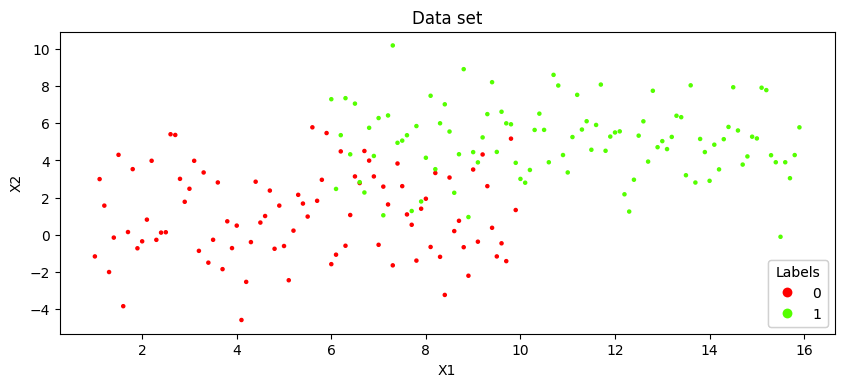

In [11]:
my_dpi = 100 # dots per inch .. (resolution)
fig,ax= plt.subplots(1,1,figsize=(1000/my_dpi, 400/my_dpi), dpi = my_dpi)

s = ax.scatter(data[:, 0], data[:, 1], s = 5,c=data[:,2],cmap="prism")
legend = ax.legend(*s.legend_elements(), title="Labels",loc='lower right')
plt.xlabel("X1")
plt.ylabel('X2')
plt.title('Data set')
ax.add_artist(legend)

# prepare the dataset:
    
        sepeate features and labels then divide into train and test set using train test split

In [12]:
x = data[:,[0,1]]
x[0:5]

array([[ 1.        , -1.17126121],
       [ 1.1       ,  2.99469089],
       [ 1.2       ,  1.565957  ],
       [ 1.3       , -2.01258943],
       [ 1.4       , -0.1572005 ]])

In [13]:
y = data[:,2]
y[0:5]

array([0., 0., 0., 0., 0.])

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,stratify=y,random_state = 66)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(type(X_train))
print(type(Y_train))
print(type(X_test))
print(type(Y_test))

(142, 2)
(142,)
(48, 2)
(48,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Feed data to our gradient descent model along with initial theta = all 0's

    after running the gradient descent with respect to parameter theta the cost is minimized and optimal theta is returned

In [15]:
alpha = 0.1                                        # alpha is learning rate
n = np.size(X_train[1])+1                          # no of features in X + 1 for X0 term which will be added
initial_Theta = np.zeros((1,n),dtype=float)        # initialize theta vector with all 0's
iterations = 5000
optimized_theta,cost_history=GradientDescent(x=X_train,y=Y_train,theta=initial_Theta,alpha=alpha,num_iterations=iterations)
print("Theta value we got after fitting the classifier model\n")
print(optimized_theta)
print("-------------------------------------")
print("change in cost with iteration\n")
print(cost_history)

Theta value we got after fitting the classifier model

[[-7.33649132]
 [ 0.66211267]
 [ 0.6463247 ]]
-------------------------------------
change in cost with iteration

[0.69312718 0.69505262 0.61530922 ... 0.23938276 0.23938227 0.23938178]


# Ploting the change of cost with each iteration to check for convergence

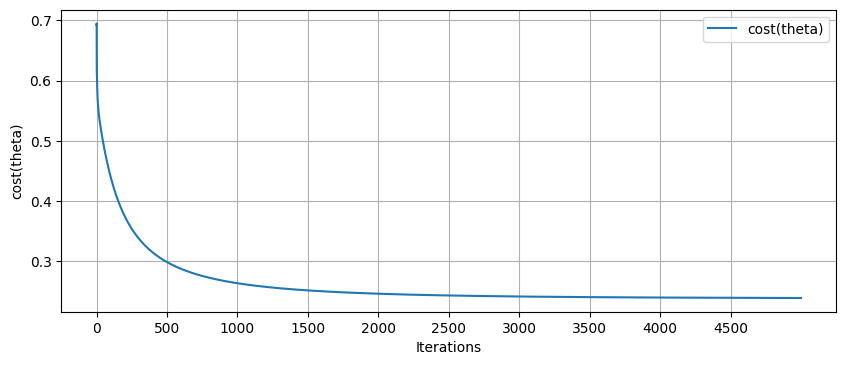

In [16]:
my_dpi = 100 # dots per inch .. (resolution)
plt.figure(figsize=(1000/my_dpi, 400/my_dpi), dpi = my_dpi) # to enlarge the plot (can be omitted)

plt.plot(np.arange(0,iterations,step=1),cost_history,label="cost(theta)")
plt.xticks(np.arange(0,iterations,step=500))
plt.xlabel('Iterations')
plt.ylabel('cost(theta)')
plt.legend()
plt.grid()

# Prediction for entire Test set and ploting the decision boundary

In [17]:
prediction = Make_Prediction(addX0(X_test),optimized_theta)

In [18]:
merged = list(zip(Y_test,prediction)) 
comparison = pd.DataFrame(merged, columns=['Actual_lable','Predicted_Label(Test_set)'])
comparison # example 3 and 37 are wrongly classified , 2 wrong classification (verify with confusion matrix)

,Actual_lable,Predicted_Label(Test_set)
0,1.0,1.0
1,0.0,0.0
2,1.0,1.0
3,1.0,0.0
4,1.0,1.0
5,0.0,0.0
6,1.0,1.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


In [19]:
accuracy = accuracy_score(prediction,Y_test)
print("The accuracy of the Logistic Regression Model on the Test set is = %.3f" %(accuracy))

The accuracy of the Logistic Regression Model on the Test set is = 0.958


# Confusion Matrix And calculating Precision Recall and F1 Score

            In the Confusion Matrix : 'label 0': 0,'label 1': 1 (class Labels)
            Row represents actual Labels while the columns represents the predicted Labels

            1st row : 1st column :Actual Label = 0 ; Predicted Label = 0
            1st row : 2nd column :Actual Label = 0 ; Predicted Label = 1
            
            2nd row : 1st column :Actual Label = 1 ; Predicted Label = 0
            2nd row : 2nd column :Actual Label = 1 ; Predicted Label = 1

In [20]:
cm  = confusion_matrix(prediction,Y_test)
print(cm)

[[22  1]
 [ 1 24]]


# Precision Recall & F1 Score:

        Precison = True Postive/(Total predicted Positive) || True Postive/(True Positive + False Positive)
                   Precision talks about how precise/accurate the model is, i.e. out of total predicted positive,
                   how many of them are actual positive.

        Recall = True Positive/(Total actual Positive) || True Postive/(True Positive + False Negetive)
                 Recall calculates how many of the Actual Positives the model captures by labeling it 
                 as Positive (True Positive)

        F1 Score = (2 * Precision * Recall) / (Precision + Recall)

In [21]:
precision = precision_score(prediction,Y_test, average='binary')
print('Precision of the Logistic Regression Model : %.3f' % precision)
recall = recall_score(prediction,Y_test, average='binary')
print('Recall of the Logistic Regression Model : %.3f' %recall)
f1 = f1_score(prediction,Y_test, average='binary')
print('F1 Score of the Logistic Regression Model : %.3f' %f1)

Precision of the Logistic Regression Model : 0.960
Recall of the Logistic Regression Model : 0.960
F1 Score of the Logistic Regression Model : 0.960


# The Decision Boundary:

            Let the equation of the st line representing the decison boundary  be theta0*X0 + theta1*X1 + theta2*X2 =0
            as x0 = 1 we can rewrite the equation as:  theta0 + theta1*X1 +theta2*X2 = 0
            
            The slope of a line represented by the equation : ax+by+c=0 is -a/b and intercept term : -c/b
            Similiarly form the equation of decision boundary we get:
                slope = -theta1/theta2
                intercept= -theta0/theta2

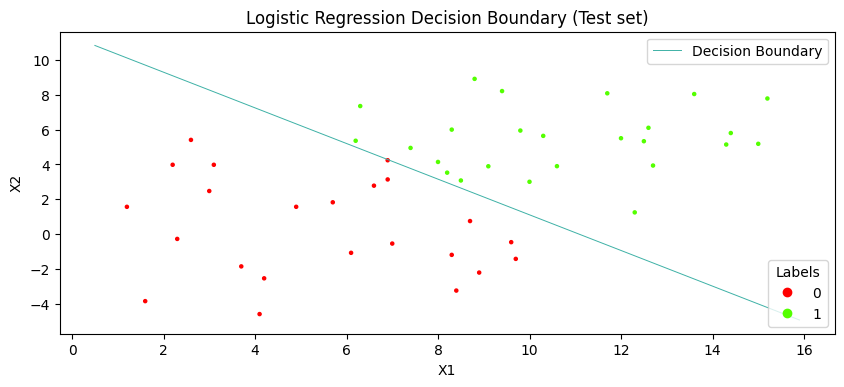

In [22]:
slope = -(optimized_theta[1] / optimized_theta[2])
intercept = -(optimized_theta[0] / optimized_theta[2])

my_dpi = 100 # dots per inch .. (resolution)
fig,ax= plt.subplots(1,1,figsize=(1000/my_dpi, 400/my_dpi), dpi = my_dpi)

scatter = ax.scatter(X_test[:, 0], X_test[:, 1], s = 5,c=prediction,cmap="prism")
legend = ax.legend(*scatter.legend_elements(), title="Labels",loc='lower right')
ax.add_artist(legend)

xval = plt.xlim()
yval = intercept + (slope * xval)
plt.plot(xval, yval, c="#3eb1a6",linewidth=0.7,label = 'Decision Boundary')
plt.xlabel("X1")
plt.ylabel('X2')
plt.title('Logistic Regression Decision Boundary (Test set)')
plt.legend()